https://archive.ics.uci.edu/dataset/9/auto+mpg


In [17]:
from scripts.info_extractor import DataFrameInfo
from scripts.transformer import DataTransform
from scripts.plotter import Plotter

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns


## **Data cleaning and EDA**

### 1. Import data

In [2]:
data = pd.read_csv('Data/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 2. QA and data cleaning

#### 2.1. Check and fix column datatypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Issue 1**: horsepower datatype should be numeric and has been read as object. Let's fix this:


In [5]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

**Issue 2**: the column 'origin' looks like a categorical feature that has been numerically encoded. 

**Issue 3**: Let's cast 'car name' and 'model year' as a categorical features too.

Let's fix these:

In [6]:
data['origin'] = pd.Categorical(data['origin'])
data['car name'] = pd.Categorical(data['car name'])
data['model year'] = pd.Categorical(data['model year'])

#### 2.2. Check for missing and inconsistent values
Are there any missing values?

In [7]:
# Let's look at the shape of the dataframe
data.shape

## output (rows, columns)

(398, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   car name      398 non-null    category
dtypes: category(3), float64(4), int64(2)
memory usage: 31.6 KB


<Axes: >

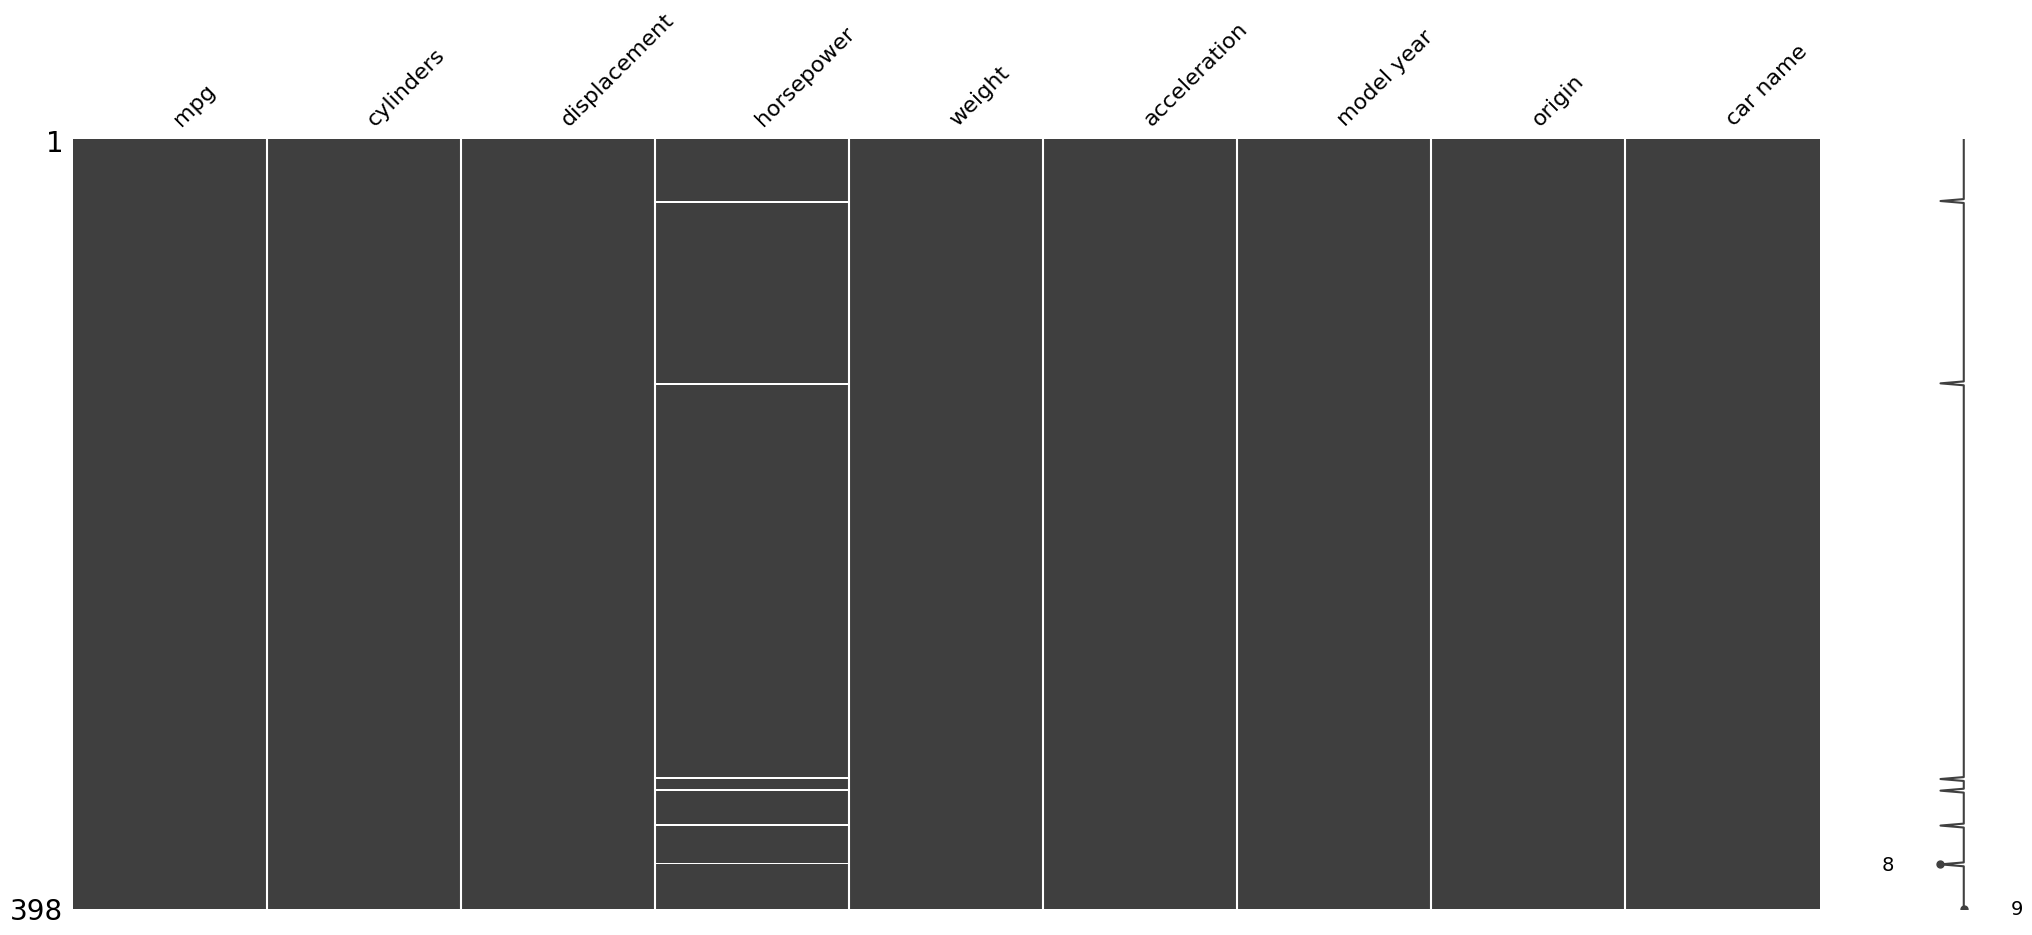

In [9]:
# Let's visualise missing values in the horsepower column
msno.matrix(data)

In [10]:
# As there is only 6 records missing horsepower data, let's take a closer look at them
data[data['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


The mode of the distribution is 150.0
The mean of the distribution is 104.46938775510205
The median of the distribution is 93.5


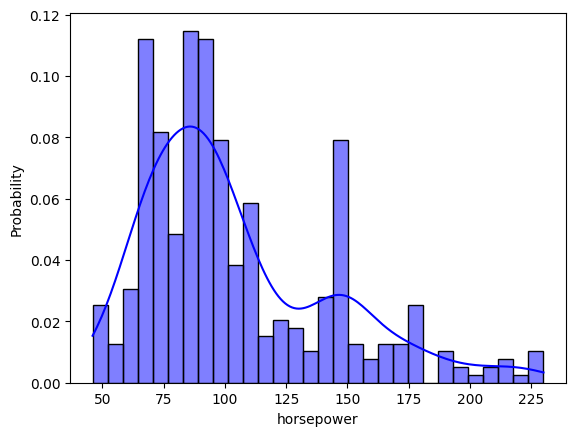

In [11]:
# Plot horsepower probability distribution
plotter = Plotter(data) # create instance of the class

plotter.continuous_probability_distribution('horsepower')

Are there any duplicated rows?

In [12]:
# Are there any duplicates? If yes, drop them
data.duplicated().value_counts()

# There are no duplicated rows in our dataset

False    398
Name: count, dtype: int64

Are there any typos or inconsistent values?

In [13]:
info_extractor = DataFrameInfo(data)  # create instance of the class

In [14]:
info_extractor.count_distinct_values()

,distinct_values_count
column,
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model year,13
origin,3
car name,305


In [15]:
# We can assume the model year column refers to the years 1970 - 1982. Need to fix datatype
# Origin seems to be a categorical variable that has already been encoded numerically 

info_extractor.show_distinct_values(['cylinders','model year', 'origin'])

Unique values in cylinders: [3 4 5 6 8]
Unique values in model year: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Unique values in origin: [1 2 3]


### 2.3. Summary statistics of numerical variables

In [16]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


### 2.4. Exploring the **target** variable: mpg (miles per gallon)

<Axes: xlabel='mpg', ylabel='Count'>

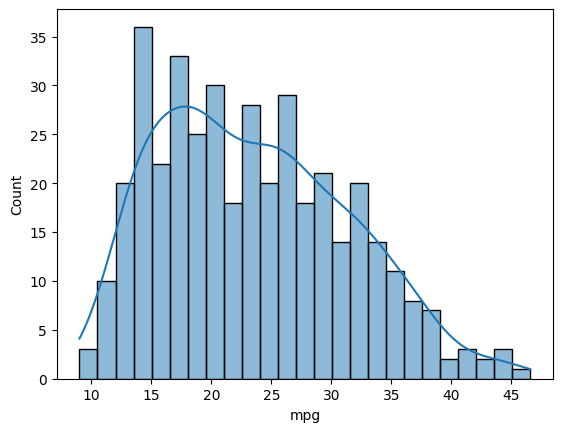

In [21]:
sns.histplot(data['mpg'], kde=True, bins=25)

<Axes: xlabel='mpg'>

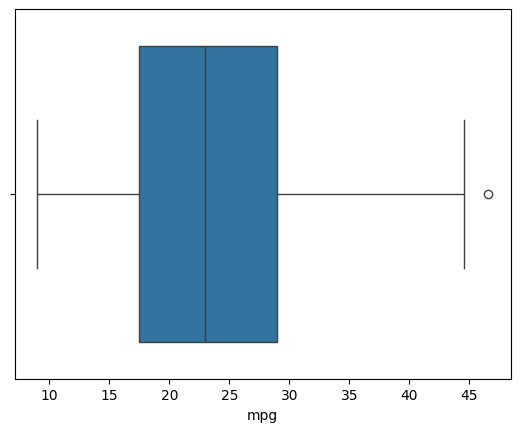

In [20]:
sns.boxplot(x=data["mpg"])

### 2.5. Exploration: relationships between features and target (mpg)

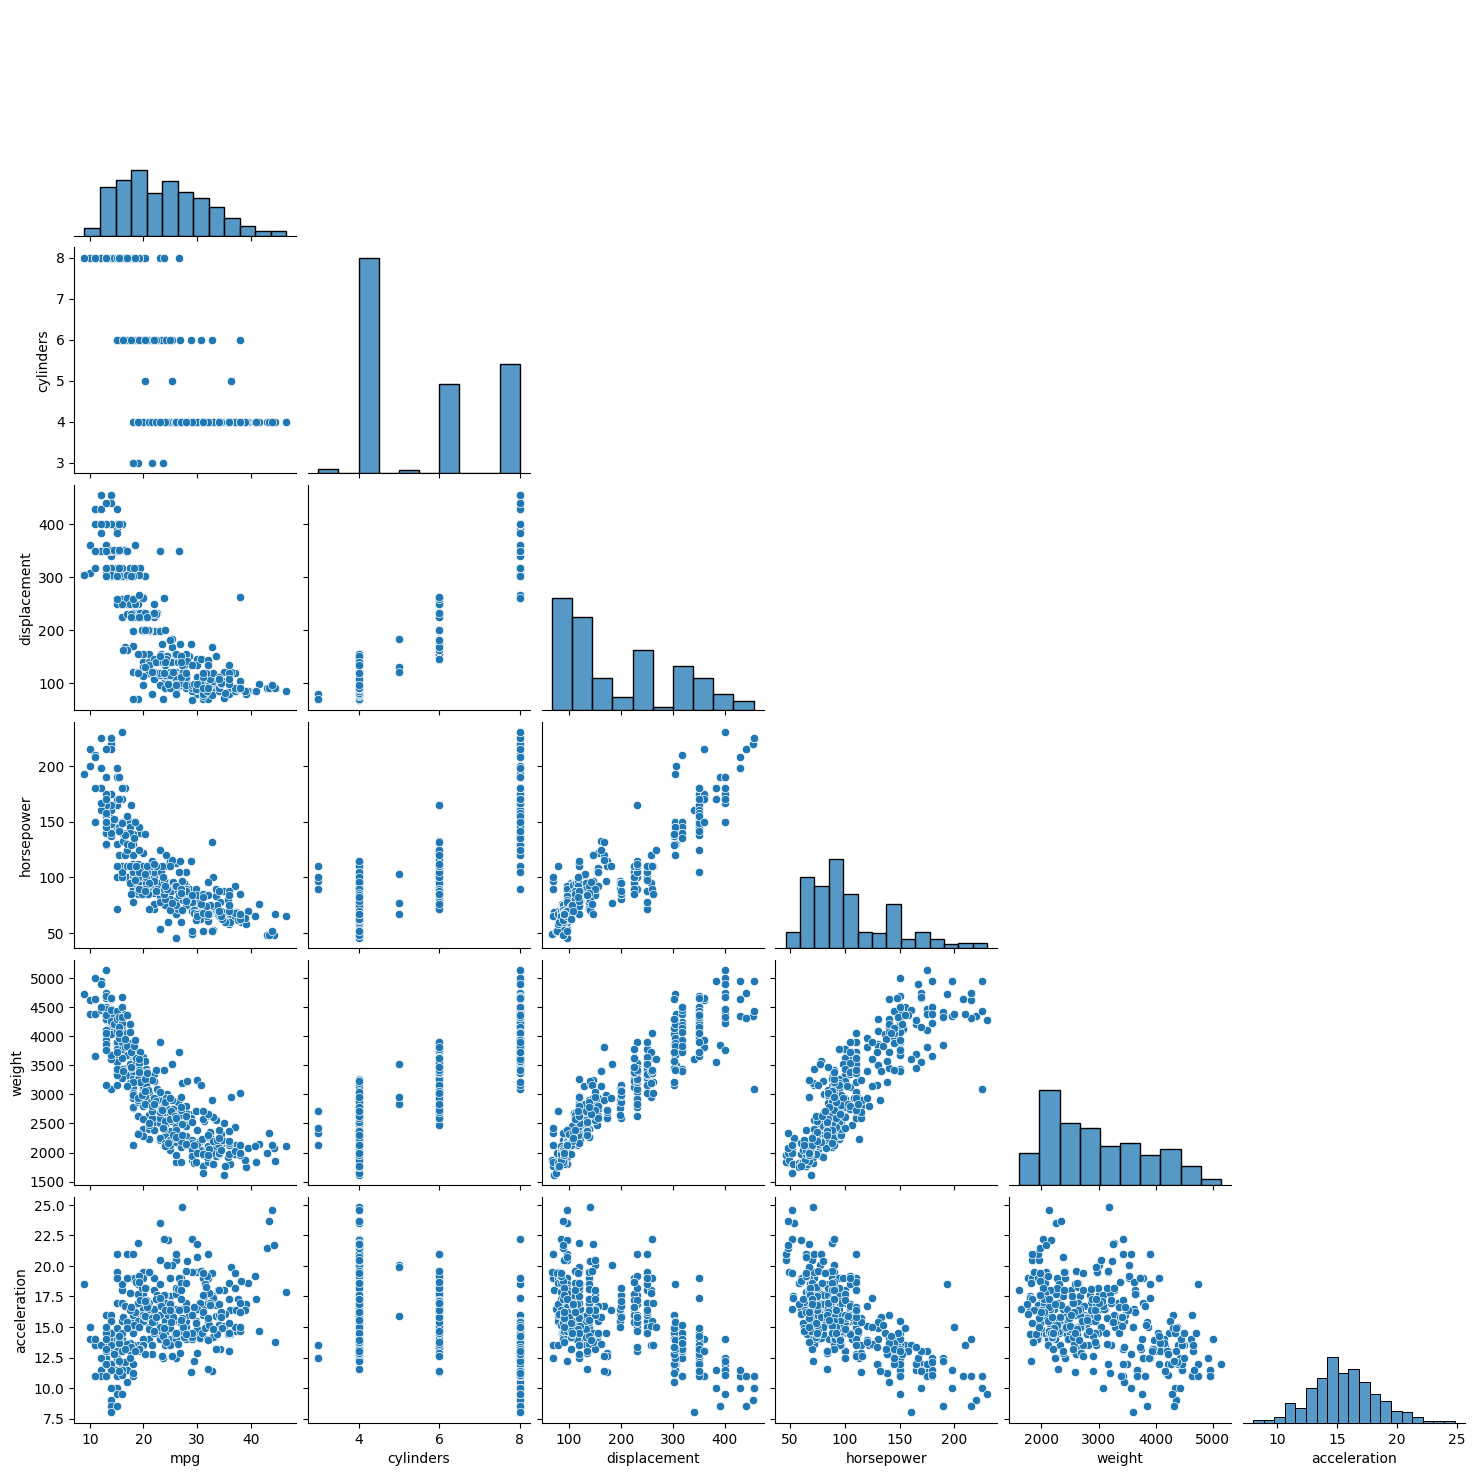

In [23]:
sns.pairplot(data.select_dtypes("number"), corner=True)

<Axes: >

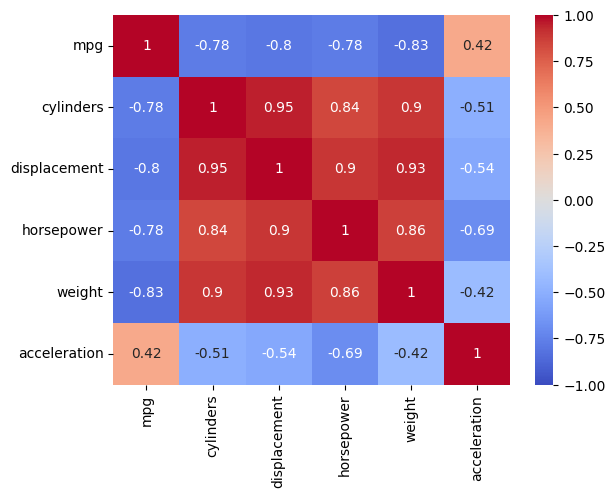

In [24]:
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")